# Portfolio optimization

**Data:** From Yahoo Finance 'API' using the Pandas DataReader's yahoo method<br>
Inpired on the Polytechnique Finance and Technology homework's course, done on **R** in 2018 <br>

**Topics :**  <br>
• Portfolio optimization <br>
• Calculation of the value at risk (VAR)<br>
• Portfolio simulation<br>
• Index replication <br>


## Loading data

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
pd.set_option('display.max_columns', None)
from pandas_datareader import data as pdr
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
yf.pdr_override() # loading progress

#Parameters
start_sp = datetime.datetime(2008,12,31)
end_sp = datetime.datetime(2018,12,31)
#dow30 = ['^DJI','AXP', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX',  'XOM',
#         'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM',
#         'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG',
#         'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WMT', 'DIS']  # 'DWDP' excluded
#dow30.sort()
ETF=['XLY','XLP','XLE','XLF','XLV','XLI','XLB','XLU','VOX','VNQ','SPY']
ETF.sort()
# Consumer Discretionary (XLY)
# Consumer Staples (XLP)
# Energy (XLE)
# Financial (XLF)
# Healthcare (XLV)
# Industrial (XLI)
# Materials (XLB)
# Technology (XLK)
# Utilities (XLU)
# Telecom (VOX)
# Real Estate Investment Trusts (VNQ)
# SP500 (SPY)

panel_data = pdr.get_data_yahoo(ETF,start_sp,end_sp)

[*********************100%***********************]  11 of 11 completed


## **1 - Portfolio optimization**
### **I.	 Descriptive analysis of the index and the ETF**

#### a.	 Daily returns by taking the adjusted close price

In [2]:
adj_close = panel_data['Adj Close']
daily_returns = adj_close.pct_change(1)
daily_returns

,SPY,VNQ,VOX,XLB,XLE,XLF,XLI,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,
2008-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-02,0.030142,-0.031824,0.019411,0.036499,0.049822,0.011182,0.036721,0.014243,0.023424,0.020339,0.050070
2009-01-05,-0.001184,-0.018419,-0.017072,0.002121,0.023529,-0.016588,-0.007825,0.004130,0.014137,-0.004799,-0.004415
2009-01-06,0.006678,0.049942,0.018927,0.022439,0.010910,0.016064,0.022001,-0.014809,-0.014272,-0.016321,0.016851
2009-01-07,-0.029956,-0.033544,-0.015297,-0.023188,-0.042398,-0.052174,-0.044679,-0.010021,-0.008081,-0.009050,-0.039686
2009-01-08,0.004081,-0.007397,0.032623,0.013989,0.012880,-0.004170,0.009779,-0.013074,-0.005092,0.005708,0.005903
2009-01-09,-0.021419,-0.051304,-0.023856,-0.024247,-0.033578,-0.031826,-0.021894,-0.017095,-0.007847,-0.010594,-0.030699
2009-01-12,-0.024021,-0.058611,-0.029722,-0.041559,-0.039474,-0.052768,-0.021955,0.000435,0.000344,-0.013002,-0.023754
2009-01-13,0.001841,0.030167,0.002950,0.005364,0.025043,0.013699,-0.017165,0.006084,-0.018907,0.008524,-0.012882


#### b. Average daily returns

In [3]:
daily_returns_avg = daily_returns.mean()
daily_returns_avg

SPY    0.000540
VNQ    0.000594
VOX    0.000383
XLB    0.000496
XLE    0.000273
XLF    0.000682
XLI    0.000562
XLP    0.000440
XLU    0.000433
XLV    0.000587
XLY    0.000733
dtype: float64

#### c. Standard deviation of daily returns

In [4]:
daily_returns_std = daily_returns.std()
daily_returns_std

SPY    0.010374
VNQ    0.016881
VOX    0.010826
XLB    0.013456
XLE    0.014848
XLF    0.018674
XLI    0.012302
XLP    0.007887
XLU    0.009349
XLV    0.009823
XLY    0.011666
dtype: float64

#### d. Correlation matrix

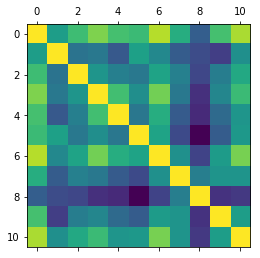

,SPY,VNQ,VOX,XLB,XLE,XLF,XLI,XLP,XLU,XLV,XLY
SPY,1.000000,0.737594,0.815125,0.885379,0.824029,0.810001,0.933380,0.777453,0.583165,0.825547,0.925340
VNQ,0.737594,1.000000,0.632956,0.644009,0.571658,0.744239,0.684301,0.580577,0.545103,0.517791,0.701662
VOX,0.815125,0.632956,1.000000,0.715332,0.663759,0.644030,0.750730,0.665214,0.532355,0.657190,0.765451
XLB,0.885379,0.644009,0.715332,1.000000,0.819422,0.700551,0.872730,0.643207,0.488948,0.679616,0.811478
XLE,0.824029,0.571658,0.663759,0.819422,1.000000,0.641152,0.775710,0.577247,0.477895,0.611984,0.716349
XLF,0.810001,0.744239,0.644030,0.700551,0.641152,1.000000,0.750481,0.541053,0.406810,0.579966,0.722742
XLI,0.933380,0.684301,0.750730,0.872730,0.775710,0.750481,1.000000,0.704061,0.526580,0.732973,0.879472
XLP,0.777453,0.580577,0.665214,0.643207,0.577247,0.541053,0.704061,1.000000,0.660378,0.713692,0.713805
XLU,0.583165,0.545103,0.532355,0.488948,0.477895,0.406810,0.526580,0.660378,1.000000,0.494792,0.505043
XLV,0.825547,0.517791,0.657190,0.679616,0.611984,0.579966,0.732973,0.713692,0.494792,1.000000,0.736259


In [5]:
correlation_matrix = daily_returns.corr()
plt.matshow(correlation_matrix)
plt.show()
correlation_matrix

### **II. The minimum variance portfolio**
##### Sum of weights = 1
##### Weight> = 0

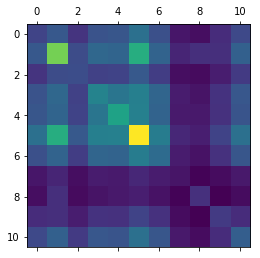

,SPY,VNQ,VOX,XLB,XLE,XLF,XLI,XLP,XLU,XLV,XLY
SPY,0.000108,0.000129,0.000092,0.000124,0.000127,0.000157,0.000119,0.000064,0.000057,0.000084,0.000112
VNQ,0.000129,0.000285,0.000116,0.000146,0.000143,0.000235,0.000142,0.000077,0.000086,0.000086,0.000138
VOX,0.000092,0.000116,0.000117,0.000104,0.000107,0.000130,0.000100,0.000057,0.000054,0.000070,0.000097
XLB,0.000124,0.000146,0.000104,0.000181,0.000164,0.000176,0.000144,0.000068,0.000062,0.000090,0.000127
XLE,0.000127,0.000143,0.000107,0.000164,0.000220,0.000178,0.000142,0.000068,0.000066,0.000089,0.000124
XLF,0.000157,0.000235,0.000130,0.000176,0.000178,0.000349,0.000172,0.000080,0.000071,0.000106,0.000157
XLI,0.000119,0.000142,0.000100,0.000144,0.000142,0.000172,0.000151,0.000068,0.000061,0.000089,0.000126
XLP,0.000064,0.000077,0.000057,0.000068,0.000068,0.000080,0.000068,0.000062,0.000049,0.000055,0.000066
XLU,0.000057,0.000086,0.000054,0.000062,0.000066,0.000071,0.000061,0.000049,0.000087,0.000045,0.000055
XLV,0.000084,0.000086,0.000070,0.000090,0.000089,0.000106,0.000089,0.000055,0.000045,0.000096,0.000084


In [6]:
import numpy as np
from scipy.optimize import minimize

covariance_matrix = daily_returns.cov()
plt.matshow(covariance_matrix)
plt.show()
covariance_matrix

Sum of weights:  1.0
{'SPY': 0.0,
 'VNQ': 0.0,
 'VOX': 0.0,
 'XLB': 2.8215683697452545e-19,
 'XLE': 6.752253775191358e-19,
 'XLF': 6.831416228116762e-18,
 'XLI': 0.0,
 'XLP': 0.48039038228597053,
 'XLU': 0.3451027546423957,
 'XLV': 0.17450686307163388,
 'XLY': 0.0}


([<matplotlib.patches.Wedge at 0x21b16fe47f0>,
 [Text(-109.79132814347116, 6.772316036087027, 'XLP'),
  Text(90.17167955477912, -63.000541317279435, 'XLU'),
  Text(57.32947706328214, 93.87934309341225, 'XLV')],
 [Text(-59.8861789873479, 3.6939905651383773, '48.0%'),
  Text(49.18455248442497, -34.36393162760696, '34.5%'),
  Text(31.270623852699345, 51.20691441458849, '17.5%')])

(-111.49593200668755,
 111.1202003877308,
 -111.54996139101958,
 110.07380768528665)

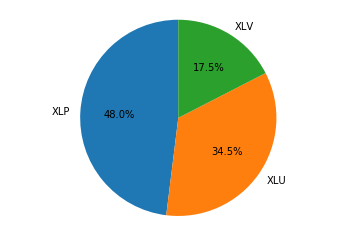

In [7]:
def portfolio_vol(w,V):
    return np.sqrt(np.dot(w.T, np.dot(V, w)))

initial_weights = np.full((daily_returns.shape[1], 1), 1/daily_returns.shape[1])
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1.0})
bounds = [(0, None) for i in range(daily_returns.shape[1])]
res = minimize(portfolio_vol, initial_weights, args=covariance_matrix, constraints=cons, bounds=bounds)
result_weights = res.x
print('Sum of weights: ', np.sum(result_weights))
portfolio_allocation = {ETF[i]:result_weights[i] for i in range(len(ETF))}   #ETF or dow30

import pprint
pprint.pprint(portfolio_allocation)
portfolio_allocation['SPY'] = 0  #'^DJI' or 'SPY'

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = [ticker for ticker in ETF if portfolio_allocation[ticker] > 0.01]  #ETF or dow30
sizes = [portfolio_allocation[ticker] for ticker in ETF if portfolio_allocation[ticker] > 0.01] #ETF or dow30

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, radius=100.0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Minimum variance potfolio: 48% Consumer Staples (XLP) 34.5% Utilities (XLU) 17.5% Healthcare (XLV) 


### **III. For a more diversified portfolio : Portfolio with minimal variance with additional constraints**
##### Minimum weight = 4 %
##### Maximum weight = 20 %

Sum of weights:  1.0
{'SPY': 0.04333089071629567,
 'VNQ': 0.04,
 'VOX': 0.1166691092837044,
 'XLB': 0.04,
 'XLE': 0.04,
 'XLF': 0.04,
 'XLI': 0.040000000000000015,
 'XLP': 0.19999999999999998,
 'XLU': 0.19999999999999998,
 'XLV': 0.19999999999999998,
 'XLY': 0.04}


([<matplotlib.patches.Wedge at 0x21b1702c0b8>,
 [Text(-13.786655385541462, 109.13261718331657, 'VNQ'),
  Text(-63.72161697834183, 89.66356857534447, 'VOX'),
  Text(-98.52904435592467, 48.90835734624741, 'XLB'),
  Text(-107.59658698663432, 22.868635045136337, 'XLE'),
  Text(-109.90344064504117, -4.608007636920288, 'XLF'),
  Text(-105.30465723821877, -31.795112264957698, 'XLI'),
  Text(-54.9985387400262, -95.26363806018455, 'XLP'),
  Text(73.60562213736459, -81.74480038370334, 'XLU'),
  Text(100.48931236233366, 44.7425759310451, 'XLV'),
  Text(42.62515457330097, 101.40560239751156, 'XLY')],
 [Text(-7.519993846658978, 59.52688209999085, '4.0%'),
  Text(-34.75724562455008, 48.90740104109698, '11.7%'),
  Text(-53.74311510323163, 26.67728582522586, '4.0%'),
  Text(-58.68904744725508, 12.473800933710727, '4.0%'),
  Text(-59.947331260931534, -2.5134587110474294, '4.0%'),
  Text(-57.43890394811932, -17.34278850815874, '4.0%'),
  Text(-29.999202949105197, -51.96198439646429, '20.0%'),
  Text(40.

(-110.20237363314223,
 112.31936845130824,
 -111.74240447231732,
 110.08297164153892)

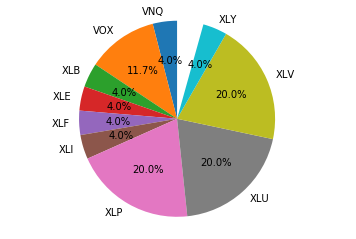

In [8]:
bounds_diverse = [(0.04, 0.2) for i in range(daily_returns.shape[1])]
res_diverse = minimize(portfolio_vol, initial_weights, args=covariance_matrix.values, method='SLSQP', constraints=cons, bounds=bounds_diverse)
result_weights_diverse = res_diverse.x
print('Sum of weights: ', np.sum(result_weights_diverse))
portfolio_allocation_diverse = {ETF[i]:result_weights_diverse[i] for i in range(len(ETF))}  #ETF or dow30
pprint.pprint(portfolio_allocation_diverse)
portfolio_allocation_diverse['SPY'] = 0    #'^DJI' or 'SPY'

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = [ticker for ticker in ETF if portfolio_allocation_diverse[ticker] > 0.01]   #ETF or dow30
sizes = [portfolio_allocation_diverse[ticker] for ticker in ETF if portfolio_allocation_diverse[ticker] > 0.01]   #ETF or dow30

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, radius=100.0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

##### Diversified portfolio:  SPY: 4%, VNQ: 4%,  VOX: 11,67%,  XLB: 4%,  XLE: 4%,  XLF: 4%
#####         *'XLI': 4% ,  'XLP': 20%,  'XLU': 20%,  'XLV': 20%,  'XLY': 4% *

### **IV. Efficient Frontier**
##### 10 portfolios
##### Yield min. = Portfolio with minimal variance
##### Max yield = 90% of the yield

(0.006888459159719603, 0.010936209843297367)

(0.0004168506705030114, 0.0007259329687208891)

Text(0.5, 0, 'Portfolio $\\sigma$')

Text(0, 0.5, 'Portfolio daily return')

Text(0.5, 1.0, 'Efficient frontier')

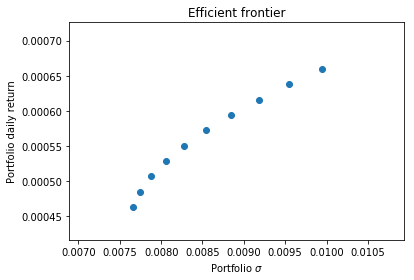

In [9]:
max_return = np.max(daily_returns_avg) # portfolio of only a single ticker that gives max return
max_return_90 = max_return * 0.9
min_return = daily_returns_avg.multiply(result_weights).sum()
interval = (max_return_90 - min_return)/9
return_vals = [min_return + interval * i for i in range(10)]

return_vols = []
for return_val in return_vals:
    cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1.0} , {'type': 'eq','fun': lambda x: daily_returns_avg.multiply(x).sum() - return_val})
    res = minimize(portfolio_vol, initial_weights, args=covariance_matrix.values, method='SLSQP', constraints=cons, bounds=bounds)
    weights = res.x
    portfolio_return = daily_returns_avg.multiply(weights).sum()
    volatility = portfolio_vol(weights, covariance_matrix)
    return_vols.append((volatility, portfolio_return))
    
ax = plt.subplot(1, 1, 1)
ax.scatter(*zip(*return_vols))
plt.xlim(return_vols[0][0] * 0.9, return_vols[-1][0] * 1.1)
plt.ylim(return_vols[0][1] * 0.9, return_vols[-1][1] * 1.1)
plt.xlabel('Portfolio $\sigma$')
plt.ylabel('Portfolio daily return')
plt.title('Efficient frontier')
plt.show()

## **2. Calculation of the value at risk (VAR)**
##### Example for an equal-weighted portfolio over a period of 5 days.
### **I. Historical VAR over a 250-day period**

In [10]:
import math

daily_returns_no_dji = daily_returns.drop('SPY', axis=1)   #'^DJI' or 'SPY'
n_tickers = daily_returns_no_dji.shape[1]
portfolio_returns_250 = daily_returns_no_dji[-250:].sum(axis=1)/n_tickers
sorted_returns_250 = sorted(portfolio_returns_250)
percentile = 0.05
daily_var_95 = (sorted_returns_250[int(percentile*len(sorted_returns_250))] + sorted_returns_250[int(percentile*int(len(sorted_returns_250) + 1/percentile))])/2
target_var_days = 5
target_var_95 = daily_var_95 * math.sqrt(target_var_days)
print('Historical VAR (95%) over', target_var_days, 'days:', target_var_95)

Historical VAR (95%) over 5 days: -0.03853518681723642


### **II. Parametric VAR (using the entire sample)**

In [11]:
portfolio_daily_returns = daily_returns_no_dji[1:].mean(axis=1)
average_portfolio_daily_returns = portfolio_daily_returns.mean()
volatilities = daily_returns_no_dji.std()
average_portfolio_volatility = volatilities.mean()
z_score = 1.96
daily_var_95_parametric = average_portfolio_daily_returns - z_score * average_portfolio_volatility
target_var_95_parametric = daily_var_95_parametric * math.sqrt(target_var_days)
print(' Parametric VAR (95%) over', target_var_days, 'days:', target_var_95_parametric)

 Parametric VAR (95%) over 5 days: -0.053936644533323204


### **III. Modified VAR with Cornish Fisher correction**

In [12]:
from scipy.stats import norm, kurtosis, skew

percentile = 0.95
mean = 0
standard_dev = 1
z_score = norm.ppf(percentile, loc=mean, scale=standard_dev)
s = skew(portfolio_daily_returns)
k = kurtosis(portfolio_daily_returns)

z_score_cf = z_score + (z_score**2 - 1) * s/6 + (z_score**3 - 3 * z_score) * k/24 - ((2*z_score**3 - 5*z_score)*s**2)/36
daily_var_95_cornish_fisher = average_portfolio_daily_returns - z_score * average_portfolio_volatility
target_var_95_cornish_fisher = daily_var_95_cornish_fisher * math.sqrt(target_var_days)
print('Cornish Fisher VAR (95%) over', target_var_days, 'days:', target_var_95_cornish_fisher)

Cornish Fisher VAR (95%) over 5 days: -0.04507783147170767


### **IV. RiskMetrics VAR with α = 95%**

In [13]:
alpha = 0.95
portfolio_returns_6_months_periods = np.array_split(portfolio_daily_returns, 20)

avg_returns = portfolio_returns_6_months_periods[0].mean()
vol = portfolio_returns_6_months_periods[0].std()

for period in portfolio_returns_6_months_periods[1:]:
    vol = math.sqrt(alpha * vol * vol + (1 - alpha) * avg_returns * avg_returns)
    avg_returns = period.mean()
    
daily_var_97_risk_metrics = -norm.ppf(alpha, loc=mean, scale=standard_dev) * vol
target_var_97_risk_metrics = daily_var_97_risk_metrics * math.sqrt(5)
print('RiskMetrics VAR (95%) over', target_var_days, 'days:', target_var_97_risk_metrics)

RiskMetrics VAR (95%) over 5 days: -0.05535630092381918


## **3. Portfolio simulation**
####  Simulation of an equal-weighted portfolio return over 30 days. 5 trajectories. 

In [72]:
from random import randint

sigma = daily_returns_std.drop('SPY')  #'^DJI' or 'SPY'
mu = daily_returns_avg.drop('SPY')   #'^DJI' or 'SPY'
def simulation(n, steps, movement):
    for sim in range(n):
        values = []
        holdings = sigma.multiply(np.full(10, 0)).add(np.full(10, 1))
        values.append(holdings.sum()/len(holdings))
        for step in range(steps):
            holdings = movement(holdings)
            values.append(holdings.sum()/len(holdings))
        plt.plot(values)
    plt.show()
    
NUMBER_OF_SIMULATIONS = 5
NUMBER_OF_STEPS = 30

### **I. Brownian motion (arithmetric)**
#### Simulation of 30 yields, compounded at each period, for each trajectories

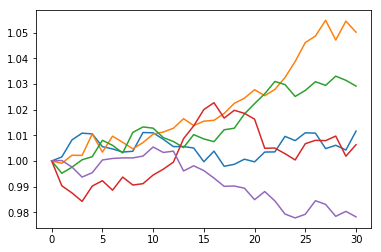

In [74]:
def brownian_movement(holdings):
    ''' periode var is defined as dS/S=μdt+σdz'''
    dz = np.random.normal(0, 1, len(holdings))
    return holdings.multiply(sigma.multiply(dz).add(mu).add(np.full(len(holdings), 1))) 

simulation(NUMBER_OF_SIMULATIONS, NUMBER_OF_STEPS, brownian_movement)

### **II. bootstrap**
#### Random selection among the 30 yield, composition of returns in each period, for each trajectory

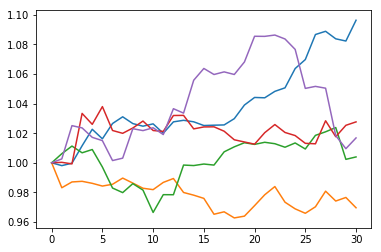

In [44]:
def bootstrap_movement(holdings):
    random_returns = daily_returns.iloc[randint(1, daily_returns.shape[0] - 1)].drop('SPY')   #'^DJI' or 'SPY'
    return holdings.multiply(random_returns.add(np.full(len(holdings), 1)))

simulation(NUMBER_OF_SIMULATIONS, NUMBER_OF_STEPS, bootstrap_movement)

## **4. Index replication**
### **I. Index replication with Ridge regression** 
### Replication of the Index (DJI or SPY) with the components using Ridge regression. 

#### Constraints :
##### Sum of weights = 1
##### Weight >= 0
##### Max Weight = 20%


Sum of weights: 0.9825269417740539
Smallest weight: 0.011065820632534857
Maximum weight: 0.20605373027110319
Average tracking error 0.0011040425748392705


C:\Users\batzp\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Ridge Regression Tracking Error')

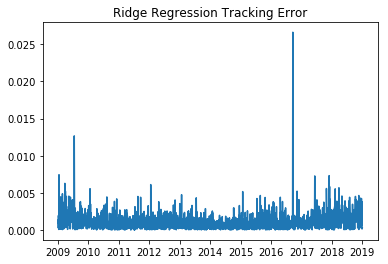

In [75]:
from sklearn.linear_model import Ridge

X = daily_returns_no_dji.iloc[1:]
Y = daily_returns['SPY'].iloc[1:]  #'^DJI' or 'SPY'

rr_model = Ridge(alpha=0.005).fit(X,Y)

print('Sum of weights:', rr_model.coef_.sum())
print('Smallest weight:', np.min(rr_model.coef_))
print('Maximum weight:', np.max(rr_model.coef_))

Y_predicted = rr_model.predict(X)
prediction_error = abs(Y - Y_predicted)
print('Average tracking error', prediction_error.mean())
plt.plot(prediction_error)
plt.title('Ridge Regression Tracking Error')
plt.show()

### **II) Replication using constrained optimization**

Sum of weights: 1.0
Smallest weight: 0.009842481324639364
Maximum weight: 0.2
Average tracking error 0.0011088487131352268


Text(0.5, 1.0, 'Optimization Tracking Error')

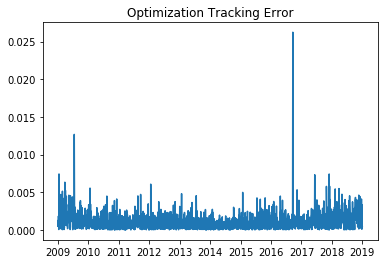

In [77]:
def mean_sq_error(w):
    Y_predict = np.dot(X, w)
    error = Y - Y_predict
    error_sq = error.multiply(error)
    return error_sq.sum()

initial_weights = np.full((X.shape[1], 1), 1/X.shape[1])
bounds_tracking = [(0, 0.2) for i in range(10)]
cons_tracking = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1.0})
res = minimize(mean_sq_error, initial_weights, constraints=cons_tracking, bounds=bounds_tracking)
Y_predicted_optimization = np.dot(X, res.x)

print('Sum of weights:', res.x.sum())
print('Smallest weight:', np.min(res.x))
print('Maximum weight:', np.max(res.x))
prediction_error_optimization = abs(Y - Y_predicted_optimization)
print('Average tracking error', prediction_error_optimization.mean())
plt.plot(prediction_error_optimization)
plt.title('Optimization Tracking Error')
plt.show()

#### **III) Results comparaison**

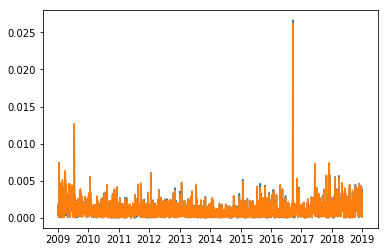

In [78]:
plt.plot(prediction_error)
plt.plot(prediction_error_optimization)
plt.show()

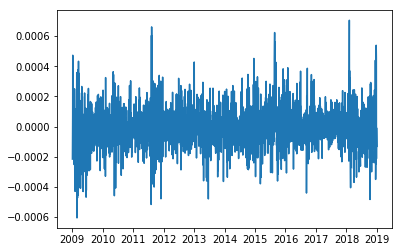

In [79]:
plt.plot(prediction_error - prediction_error_optimization)
plt.show()

In [21]:
weight_differences = abs(rr_model.coef_ - res.x)
print('Min weight difference:', np.min(weight_differences))
print('Max weight difference:', np.max(weight_differences))

Min weight difference: 0.00015735324102853984
Max weight difference: 0.0031415508000766923


### **Both replication methods are very similar based on the tracking error**